# Assignment 3 : Computation of length scales and spectrum in space

We have fluctuations of velocity in time, but not in space. In order to get fluctuations of velocity in space (for a given time $t_0$) we should have an array of anemometers very close to each other (microns, probably), which is quite difficult (it is much more easier for CFD results). 

Fortunately, there is the [Taylor hypothesis](https://www-sciencedirect-com.recursos.biblioteca.upc.edu/science/article/pii/B9780080443508500014#p15) (see also Pope's book reference at the beginning of the chapter, p. 223), which says that if turbulence can be considered (average) steady and fluctuations are much smaller than average velocity, time can be replaced by $x/\overline{u}$. The we can estimate the lenght scales of turbulence by replacing $t$ by $x$ and frequency $f$ by wavenumber $k$ (do not confuse with turbulent kinetic energy).

In this assignment it is proposed to to make all the previous analysis and find, in space:

- Kolmogorov's scale
- Autocorrelation function
- Integral scale
- Power spectrum (in $k$) and check the Kolmogorov's power law.

Do not do that for $y = 0 \,\text{mm}$. Choose another $y$ !

---------------------------------
# A3: GROUP 1 SOLUTION (Pol Padilla, Ferran de Miguel, Alejandro Sanchez)
---------------------------------

## 0. Importing basic libraries:

In [136]:
import pandas as pd
import numpy as np

# PRINT COLORS:
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

## 1. Importing turbulence data and pre-process:

The turbulence data is provided for de downstream flow after an airfoil. It was measured at several heights $y$, with 1000 samples over 1 second.

In [137]:
newTurbulenceData = pd.read_hdf("TurbVel.hdf")
newTurbulenceData

,y = -40mm,y = -35mm,y = -30mm,y = -25mm,y = -20mm,y = -15mm,y = -10mm,y = -5mm,y = 0mm,y = 5mm,y = 10mm,y = 15mm,y = 20mm,y = 25mm,y = 30mm,y = 35mm,y = 40mm
Time,,,,,,,,,,,,,,,,,
0.000,20.916005,21.013892,19.890369,20.564816,19.247617,20.242762,20.171834,19.326923,17.711748,17.954515,19.112384,19.247617,18.955669,19.624038,18.989162,20.337691,17.901476
0.001,20.757920,21.124463,19.878740,20.528820,19.258909,20.278330,20.124676,19.417902,16.314876,17.534186,19.213710,19.292888,18.922264,19.704760,18.833365,20.313920,17.743229
0.002,20.661140,21.087559,20.101135,20.492846,19.213710,20.337691,20.136438,19.360977,13.902128,18.590930,19.202443,19.349631,18.933382,19.716296,18.601871,20.254624,17.922668
0.003,20.794288,21.099841,20.207287,20.421109,19.315560,20.219094,20.124676,19.349631,12.840679,18.340470,19.281544,19.372364,18.955669,19.785785,18.503472,20.278330,17.471901
0.004,20.952667,21.099841,20.349604,20.480892,19.292888,20.313920,20.148242,19.326923,15.086783,18.243283,19.247617,19.349631,18.944540,19.785785,17.838033,20.195451,18.135857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.995,21.087559,21.248015,19.349631,20.007225,19.785785,19.832212,19.612552,18.844470,17.010890,18.877784,17.234927,19.937022,20.373413,18.800155,17.451182,18.922264,19.808986
0.996,21.013892,21.334855,19.474945,19.972095,19.774176,19.855463,19.601036,18.844470,16.960352,18.082340,17.513403,20.183621,20.148242,18.800155,17.440815,19.532177,20.207287
0.997,21.050677,21.310005,19.440708,20.054129,19.704760,19.867080,19.578058,18.888878,16.373577,18.623839,17.680285,19.960385,20.148242,18.329634,17.461523,19.797365,20.160017


To understand the data, statistical values are calculated from the dataframe created.

In [138]:
statData = newTurbulenceData.describe()
statData

,y = -40mm,y = -35mm,y = -30mm,y = -25mm,y = -20mm,y = -15mm,y = -10mm,y = -5mm,y = 0mm,y = 5mm,y = 10mm,y = 15mm,y = 20mm,y = 25mm,y = 30mm,y = 35mm,y = 40mm
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,21.104367,21.044473,20.757320,20.316435,20.247308,20.270573,19.733937,19.493431,17.798975,17.059820,19.138614,19.377307,19.330135,19.228752,19.026175,19.121565,18.570242
std,0.187226,0.228523,0.762061,0.776583,0.536762,0.262442,0.251107,0.491538,1.124547,0.988907,0.305786,0.354726,0.462051,0.478166,0.694788,0.662401,0.860208
min,20.468907,20.207287,18.634798,18.866662,19.123603,19.704760,19.168608,18.297226,12.824605,13.765816,17.234927,17.764286,17.245155,17.265657,16.373577,16.511184,16.101291
25%,20.989390,20.989390,20.322845,19.751012,19.797365,20.065853,19.566596,19.075895,17.327294,16.491465,18.977981,19.213710,19.109572,18.989162,18.678760,18.722815,17.983749
50%,21.099841,21.112168,20.733695,20.225018,20.272393,20.219094,19.704760,19.532177,18.071674,17.173579,19.168608,19.440708,19.338256,19.258909,19.045057,19.258909,18.689782
75%,21.173826,21.186155,21.062977,20.624988,20.676252,20.492846,19.913683,19.937022,18.569031,17.774791,19.315560,19.601036,19.658606,19.520739,19.477807,19.601036,19.227838
max,21.647802,21.447038,23.727658,23.157105,21.774209,20.842895,20.361487,20.661140,19.843817,19.727874,20.077620,20.230943,20.721574,20.444995,20.830752,20.337691,20.492846


The study of the velocity fluctuations in space will be done at a selected height:

In [139]:
# height selected for the study:
################################
Ycase = 'y = 5mm'
################################

A new dataframe is created with only the time-velocity of the desired height:

In [140]:
timeYdata = newTurbulenceData[[Ycase]]
timeYdata

,y = 5mm
Time,
0.000,17.954515
0.001,17.534186
0.002,18.590930
0.003,18.340470
0.004,18.243283
...,...
0.995,18.877784
0.996,18.082340
0.997,18.623839


The mean velocity of the height is extracted from the statistical values preiously calculated:

In [141]:
# mean velocity [m/s]
Umean=statData.loc['mean'][Ycase]
Umean

17.059820449724764

## 2. Taylor hypothesis

For the study of fluctiations in space, the Taylor hypothesis allows to convert the time samples into space samples. As stated by  [Tuncer Cebeci](https://www-sciencedirect-com.recursos.biblioteca.upc.edu/science/article/pii/B9780080443508500014#p15), the hypothesis assumes that "the fluctuations are too weak to induce any significant motion of their own, so
that disturbances are convected along at the mean stream velocity". 

The differential equation that describes Taylor's hypothesis:
$$
\frac{\partial}{\partial t} = - \bar{u} \frac{\partial}{\partial x}
$$

As $\bar{u}$ is constant, the integration yields (as stated by the assignment statement): 
$$
x = t \cdot \bar{u}
$$

In [142]:
spaceXdata = timeYdata

list1 = list(map(float,spaceXdata.index.values)) # time [s]
list2 = []
for i in list1:
    list2.append(i * Umean) # space x [m]

spaceXdata = spaceXdata.rename(index=dict(zip(list1,list2)))
spaceXdata.index.name="Space"
spaceXdata



,y = 5mm
Space,
0.000000,17.954515
0.017060,17.534186
0.034120,18.590930
0.051179,18.340470
0.068239,18.243283
...,...
16.974521,18.877784
16.991581,18.082340
17.008641,18.623839


# 3. Turbulence space fluctuations post-processing

- Plotting velocity time serie at the height:

<AxesSubplot: xlabel='Time', ylabel='u'>

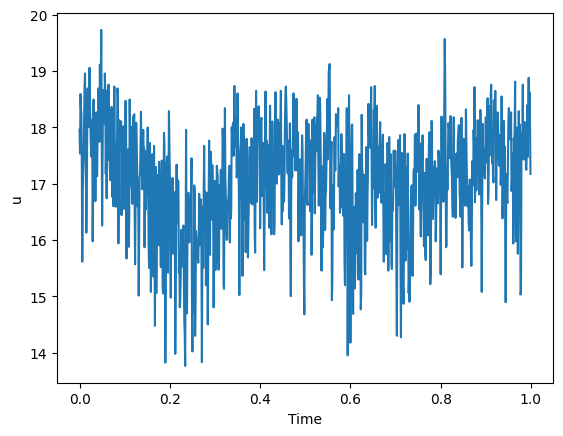

In [143]:
timeYdata[Ycase].plot(ylabel="u")

- Plotting velocity space serie at the height (is the time distribution but over a different scale, as per Taylor's hypothesis):

<AxesSubplot: xlabel='Space', ylabel='u'>

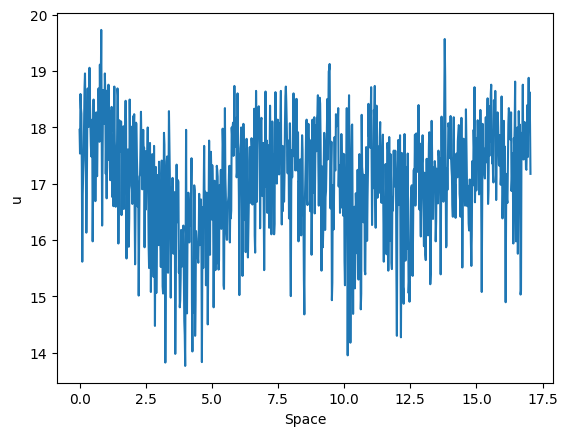

In [144]:
spaceXdata[Ycase].plot(ylabel="u")

- The computation of velicity fluctuation in space is $u'=u-\bar{u}$:

<AxesSubplot: xlabel='Space'>

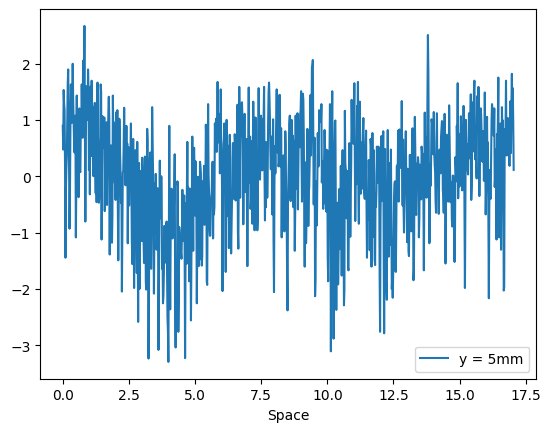

In [145]:
turbVelFluct = spaceXdata-Umean
turbVelFluct.plot()

- The turbulent kinetic energy TKE with the assumption of isotropic turbulence at small scales $k\approx \frac{3}{2} \bar{u'}^2$:

In [146]:
ke = 1.5*statData.loc["std"][Ycase]**2
ke #[m2/s2]

1.4669064176084308

### 3.1. Turbulence space scales:

- The turbulence Reynolds number, locally defined in this point, is calculated with a length scale, which can be estimated, for now, as the larger eddy in the flow, of the order of the profile's chord. It is also needed the viscosity of air.

$$ \text{Re}_t = \frac{\sqrt{k}c}{\nu} \tag{5}$$

In [147]:
nu = 1.5e-5 # m^2/s
c = 0.265 # m
Re_t = np.sqrt(ke)*c/nu
print('Re_t = {:.5g}'.format(Re_t))

Re_t = 21397


#### 3.1.1. Kolmogorov length scale $\eta_k$

The [Kolmogorov length scale](https://en.wikipedia.org/wiki/Kolmogorov_microscales) (as we are studying space and not time fluctuations) that defines the order of our length-space resolution can be estimated as

$$ \eta_k = \left( \frac{\nu^3}{\varepsilon} \right)^{1/4}$$

where $\varepsilon$ is the energy dissipation rate, that can be estimated as 

$$ \varepsilon = \frac{k^{\frac{3}{2}}}{c} $$ 

(it is considered that energy is injected at larger scales)

In [148]:
epsilon = ke**1.5/c
epsilon # m^2/s^3

6.704366370124131

In [149]:
eta_K = (nu**3/epsilon)**(1/4)
eta_K

0.00014978868550041724

#### 3.1.2. Autocorrelation $\rho(\eta)$ and Integral length scale $L$

An integral length scale is defined with the autocorrelation of time signal. 

$$ R(\eta) = \overline{u'(x)u'(x+\eta)} $$

- Using the pandas function that provides the normalized correlation $\rho(\eta)=\frac{R(\eta)}{R(0)} $:

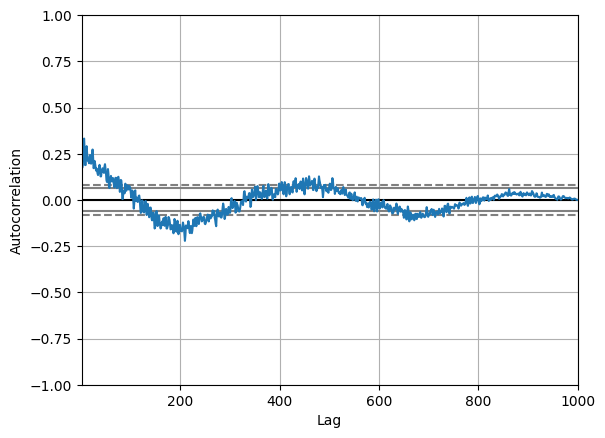

In [150]:
uPrime = turbVelFluct[Ycase].values
autocorr = pd.plotting.autocorrelation_plot(uPrime).get_lines()[5].get_xydata()

Using the x-values from the samples (obtained throught Taylor's hypothesis) and plotting a narrower span:

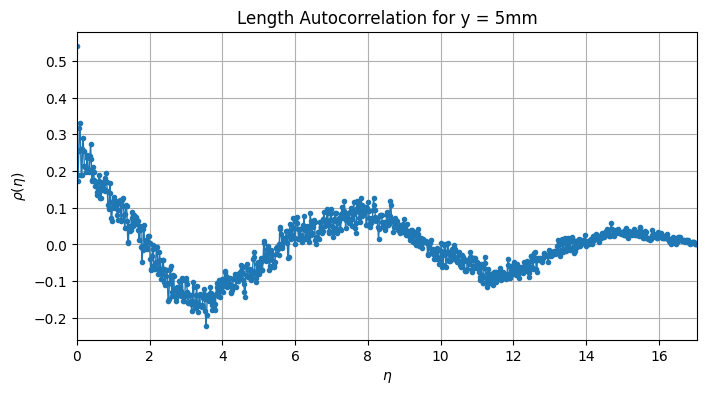

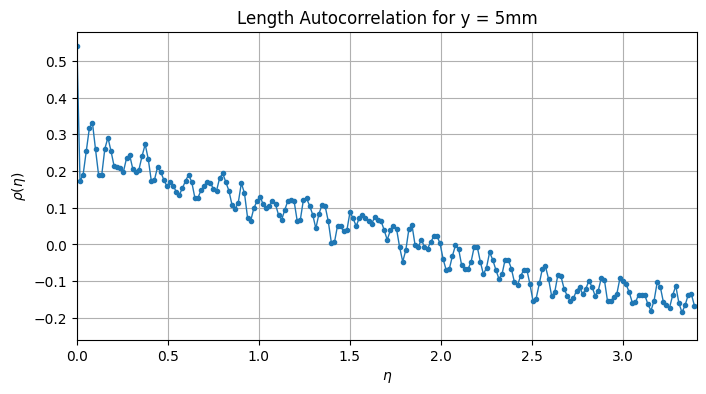

In [151]:
autocorr[:,0]=turbVelFluct.index.values

import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(8,4))
ax.plot(autocorr[:,0],autocorr[:,1],'.-',linewidth=1)
#ax = plt.gca()
ax.set_xlim(0,autocorr[-1,0]*1)
ax.set_ylabel(r'$\rho(\eta)$')
ax.set_xlabel(r'$\eta$')
ax.set_title("Length Autocorrelation for "+Ycase)
ax.grid(which='both')

fig,ax = plt.subplots(figsize=(8,4))
ax.plot(autocorr[:,0],autocorr[:,1],'.-',linewidth=1)
#ax = plt.gca()
ax.set_xlim(0,autocorr[-1,0]*0.20)
ax.set_ylabel(r'$\rho(\eta)$')
ax.set_xlabel(r'$\eta$')
ax.set_title("Length Autocorrelation for "+Ycase)
ax.grid(which='both')



Integrating the autocorrelation function to obtain the integral length scale, as defined in [Integral length scale](https://en.wikipedia.org/wiki/Integral_length_scale) ($\rho(\eta)$ is the autocorrelation respect to space $\eta$):

$$
L = \int_0^\infty \rho (\eta) d\eta
$$

In [152]:
from scipy import integrate
Lpandas = integrate.trapezoid(autocorr[:,1],autocorr[:,0])
Lpandas

-0.013146777656260461

- As there are too few samples to get a feasible correlation (positive value), the statistics model package is used to estimate again the correlation with more precision, selecting the number of lags for the computation:

In [153]:
import statsmodels.api as sm
rho = sm.tsa.acf(uPrime,nlags=50,fft=False)
rho

array([1.        , 0.54125627, 0.1726618 , 0.18979351, 0.25316918,
       0.31585206, 0.33191417, 0.25882302, 0.18839786, 0.18883691,
       0.26065123, 0.29085212, 0.25387137, 0.21265168, 0.20988054,
       0.20777291, 0.19840506, 0.23491047, 0.24341545, 0.20592875,
       0.19591278, 0.20404119, 0.24071472, 0.27268243, 0.23221103,
       0.17169757, 0.17602431, 0.21120253, 0.19751833, 0.17639594,
       0.15848027, 0.17066134, 0.1604413 , 0.14379191, 0.1345345 ,
       0.15322715, 0.17302856, 0.18974962, 0.17041126, 0.12751867,
       0.12721714, 0.14703283, 0.16014166, 0.17122385, 0.16791496,
       0.15100799, 0.14619485, 0.18101574, 0.19326549, 0.16951322,
       0.14587753])

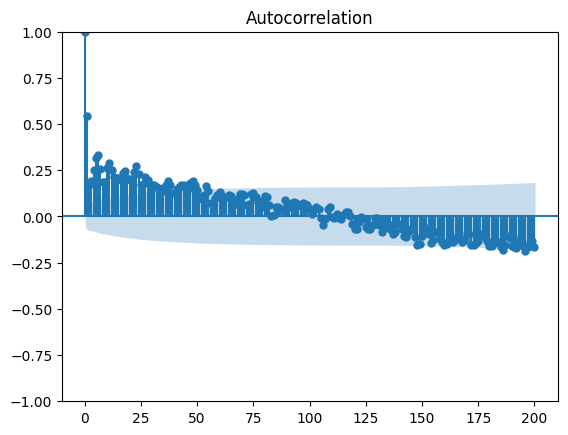

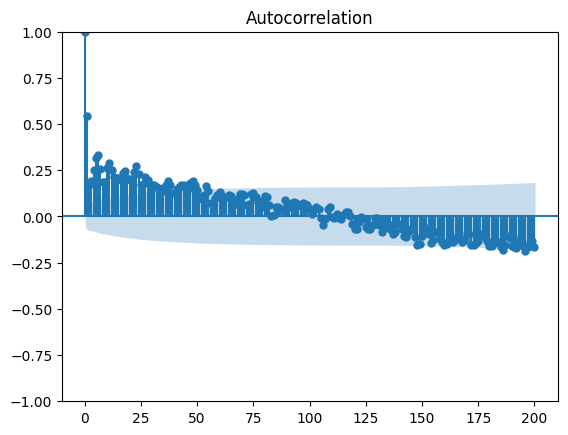

In [154]:
import statsmodels.graphics.api as smg
smg.tsa.plot_acf(uPrime,lags=200,fft=False)

Computing again the integral length scale, with more accuracy due to the zero lag point (missing in the pandas method):

In [155]:
Lstats = integrate.trapezoid(rho[0:50],autocorr[0:50,0])
Lstats

0.17825910264141692

In [156]:
print(bcolors.FAIL+"The integral length scale L is {0} with pandas autocorrelation function (negative wrong value)".format(Lpandas)+bcolors.ENDC)
print(bcolors.OKGREEN+"The integral length scale L is {0} with statsmodels autocorrelation function (positive feasible value)".format(Lstats)+bcolors.ENDC)

The integral length scale L is -0.013146777656260461 with pandas autocorrelation function (negative wrong value)
The integral length scale L is 0.17825910264141692 with statsmodels autocorrelation function (positive feasible value)
